# Bike Sharing Case Study
### Problem Statement:- A US bike-sharing provider BoomBikes has gathered a large dataset on daily bike demands across the American market based on some factors, and need us to come up with a model that would optimize their revenues.

### Essesntially the company wants to know:-
- #### Which variables are significant in predicting the demand for shared bikes.
- #### How well those variables describe the bike demands

## Step 1:- Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("day.csv")
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### From the above, we know that the dataset is complete, i.e, no missing values.

### We know from the problem statement that the column "cnt" is the target variable.
### As it happens, the columns "casual" and "registered" add up to form the "cnt" column. We will drop these two columns as these will not help in our modelling.

In [4]:
df=df.drop(["casual","registered"],axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Other columns that we can drop are "instant", "dteday" as these are not pattern forming variables.

In [5]:
df=df.drop(["instant","dteday"],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# Let's rename the columns so they are easily understandable.
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count','weathersit':'weather','temp':'temperature','atemp':'feeling temperature'}, inplace=True)

In [7]:
df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,feeling temperature,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Let's visualize the entire dataset and see if we find something.

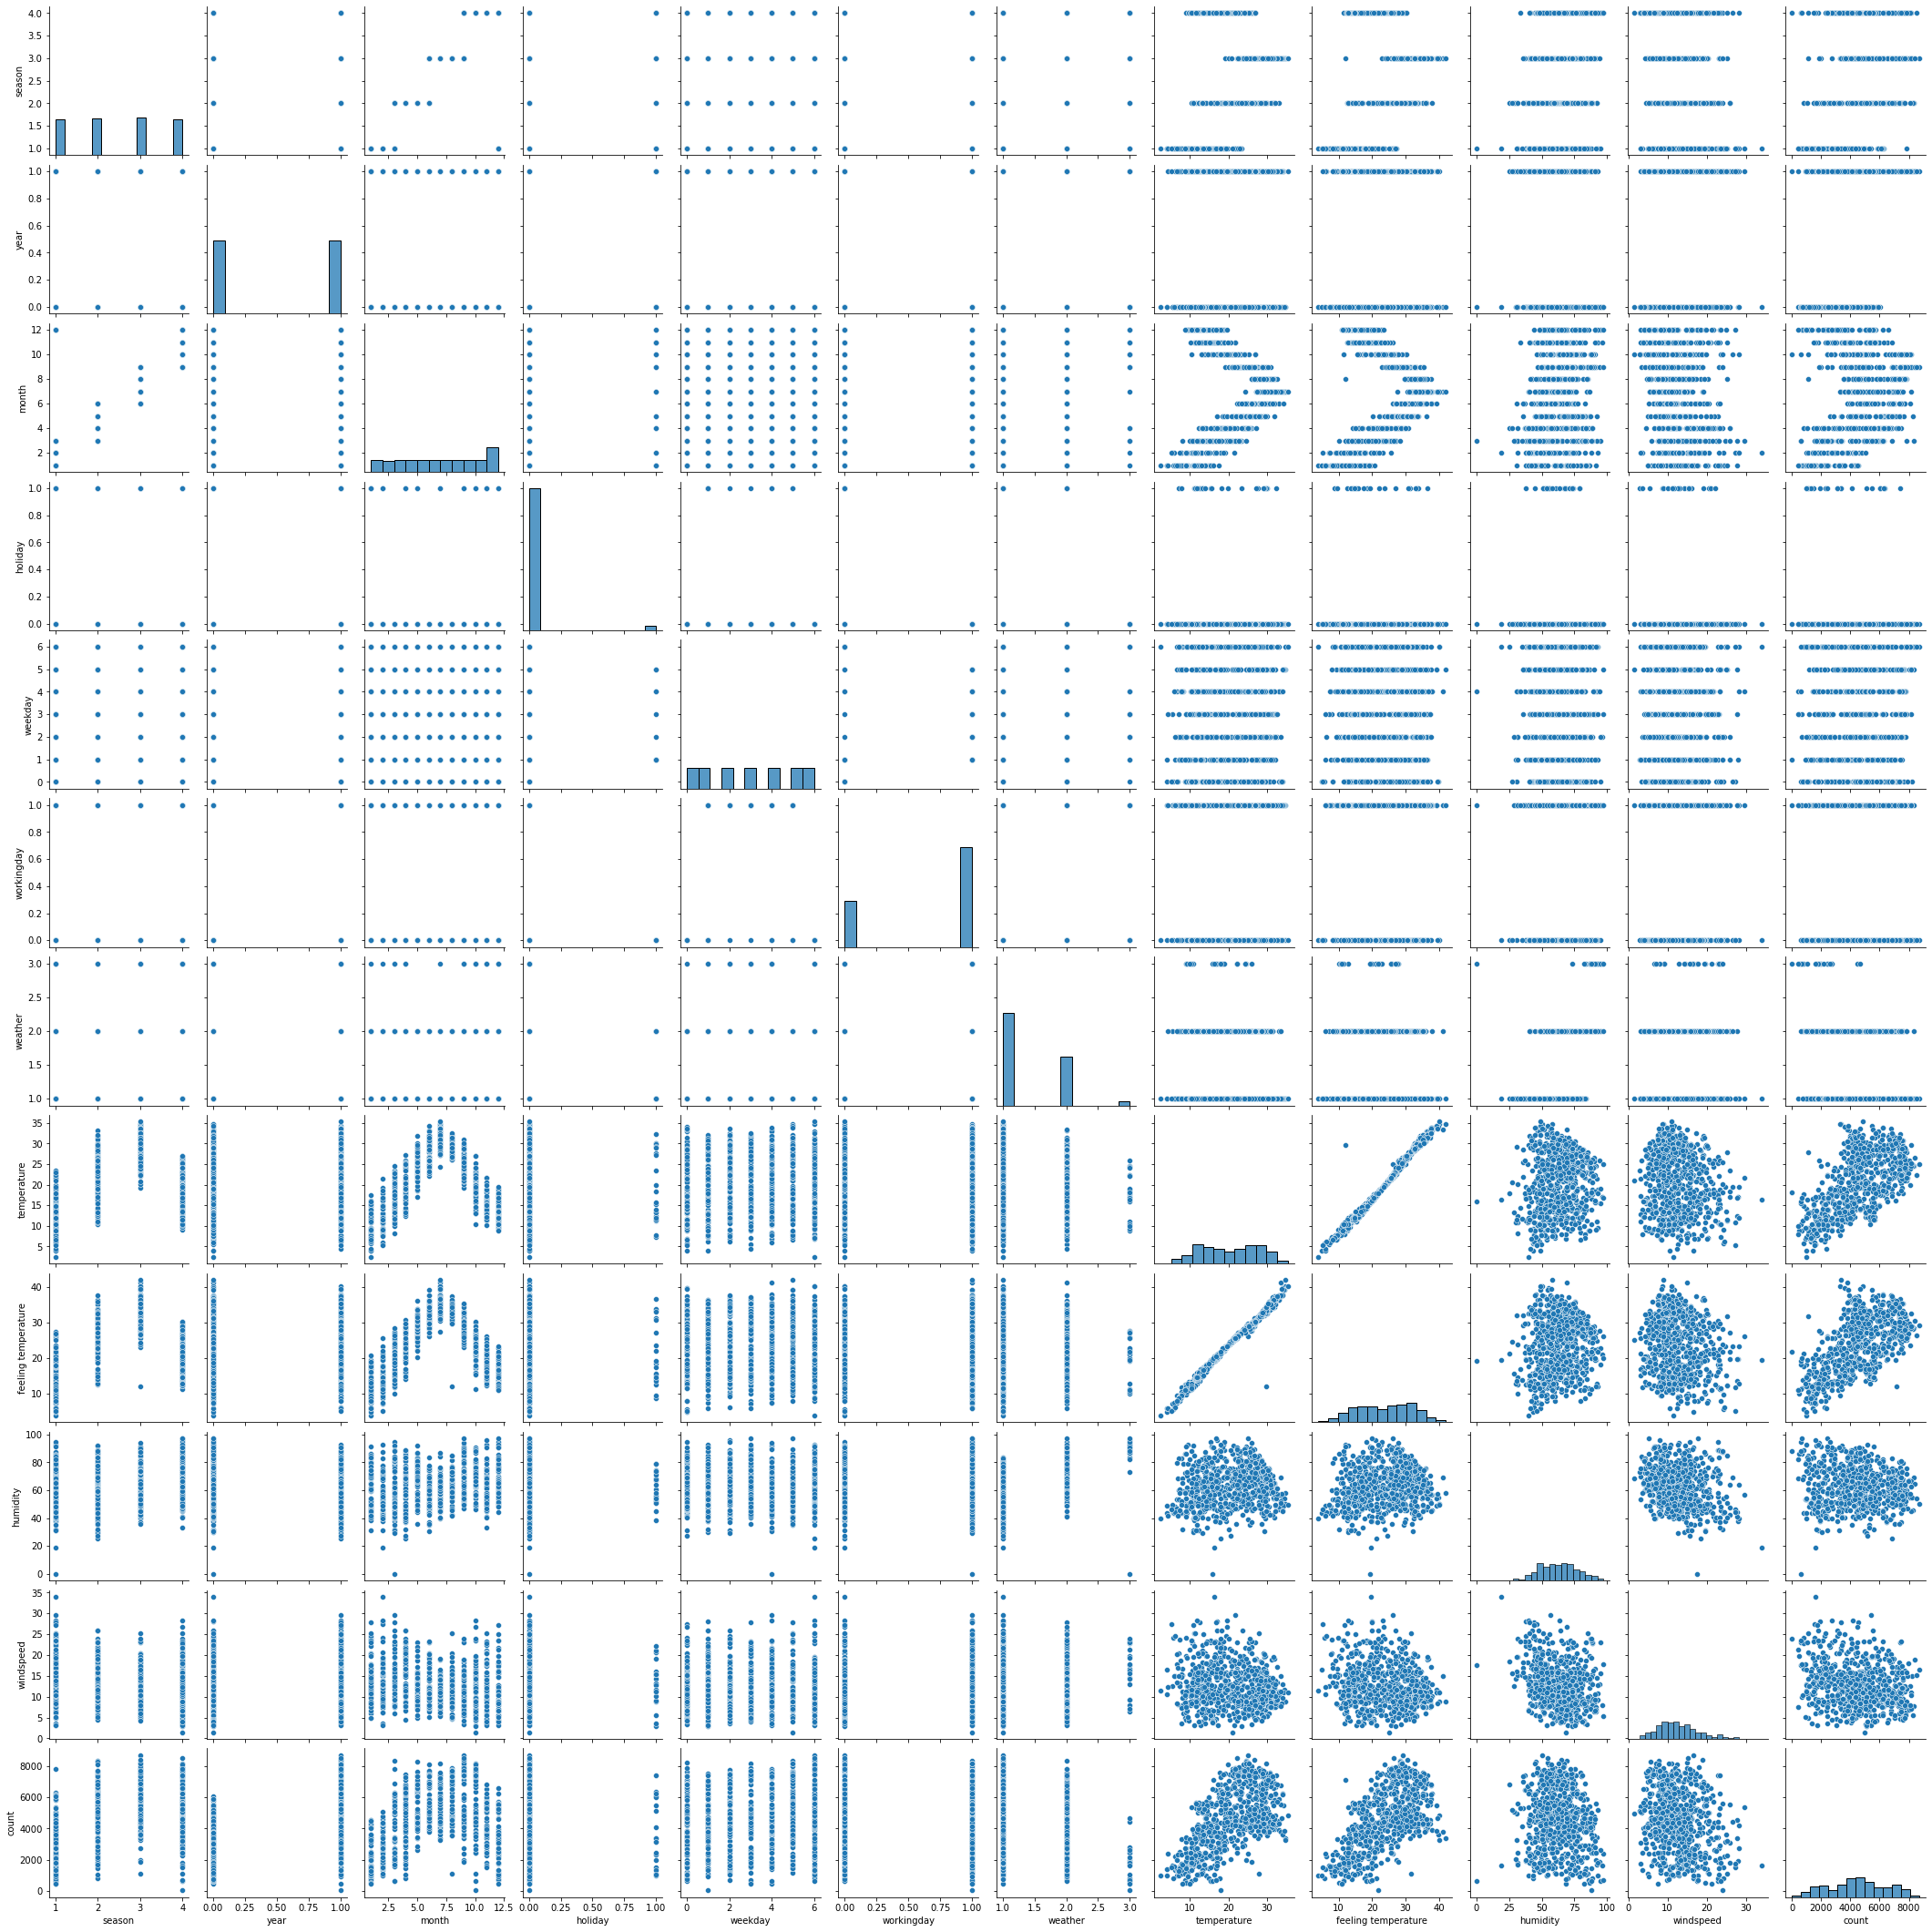

In [8]:
sns.pairplot(df)
plt.show()

### At first look, nothing much can be made out of these graphs, however, the two columns "temperature" and "Feeling temperature" seem to have a high correlation and collinearity. Hence, one of them can be dropped from our model building. We will be dropping "feeling temperature" from our analysis.

In [9]:
df.drop("feeling temperature",axis=1, inplace=True)

### Let's also visualize the categorical variables.

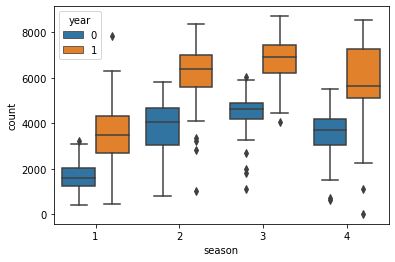

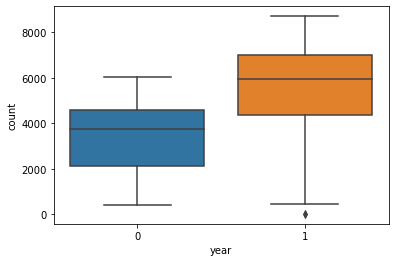

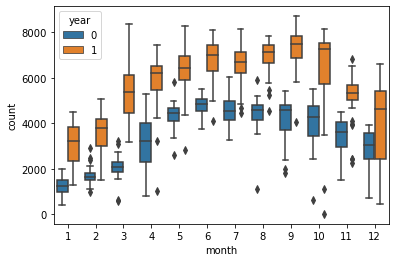

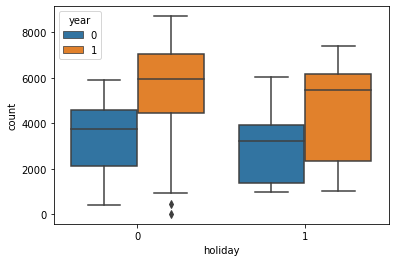

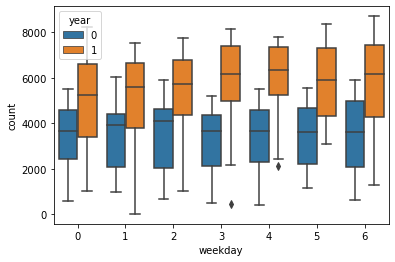

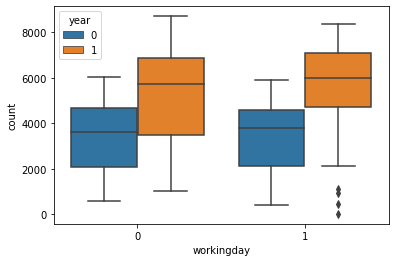

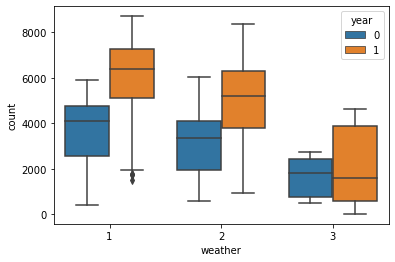

In [10]:
sns.boxplot(x = 'season', y = 'count',hue='year', data = df)
plt.show()
sns.boxplot(x = 'year', y = 'count', data = df)
plt.show()
sns.boxplot(x = 'month', y = 'count',hue='year', data = df)
plt.show()
sns.boxplot(x = 'holiday', y = 'count',hue='year', data = df)
plt.show()
sns.boxplot(x = 'weekday', y = 'count',hue='year', data = df)
plt.show()
sns.boxplot(x = 'workingday', y = 'count',hue='year', data = df)
plt.show()
sns.boxplot(x = 'weather', y = 'count',hue='year', data = df)
plt.show()

### It is evident that the count was higher for every variable for when the value of year=1. i.e, year 2019. This looks like an upward trend from the year 2018, which could be due to multiple factors like exposure, lifestyle changes, etc.

## Step 2:- Preparing the data.


### We have multiple categorical data columns with non binary values. We will create dummy variables so that we can define them using binary values, i.e, 0 and 1. 
### Before creating the dummy variables, let's use the data dictionary and map some categorical columns to their decrypted string values for easier comprehension.

In [11]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weather = df.weather.map({1:'Clear',2:'Misty',3:'Light snow/rain',4:'Heavy snow/rain'})
df.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


#### Moving on to creating dummy variables for columns "season","month","weekday","weather". We will use the inbuil

In [12]:
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weather,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [13]:
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head()

,season,year,month,holiday,weekday,workingday,weather,temperature,humidity,windspeed,...,sat,sun,thu,tue,wed,Light snow/rain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [14]:
# Now since we have added the dummy variables, let's drop the original columns.

In [15]:
df_new.drop(['season','month','weekday','weather'], axis = 1, inplace = True)

In [16]:
df_new.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light snow/rain,Misty,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## Step 3:- Splitting the data into train and test sets.

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)
df_train.shape


(510, 29)

In [18]:
df_test.shape

(220, 29)

In [19]:
# Next, let's perform some scaling on the temperature, humidity and windspeed columns.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [21]:
num_vars = ['temperature','humidity','windspeed','count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light snow/rain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### As we can see above, the min and max values of all the variables are between 0 and 1. 

<AxesSubplot:>

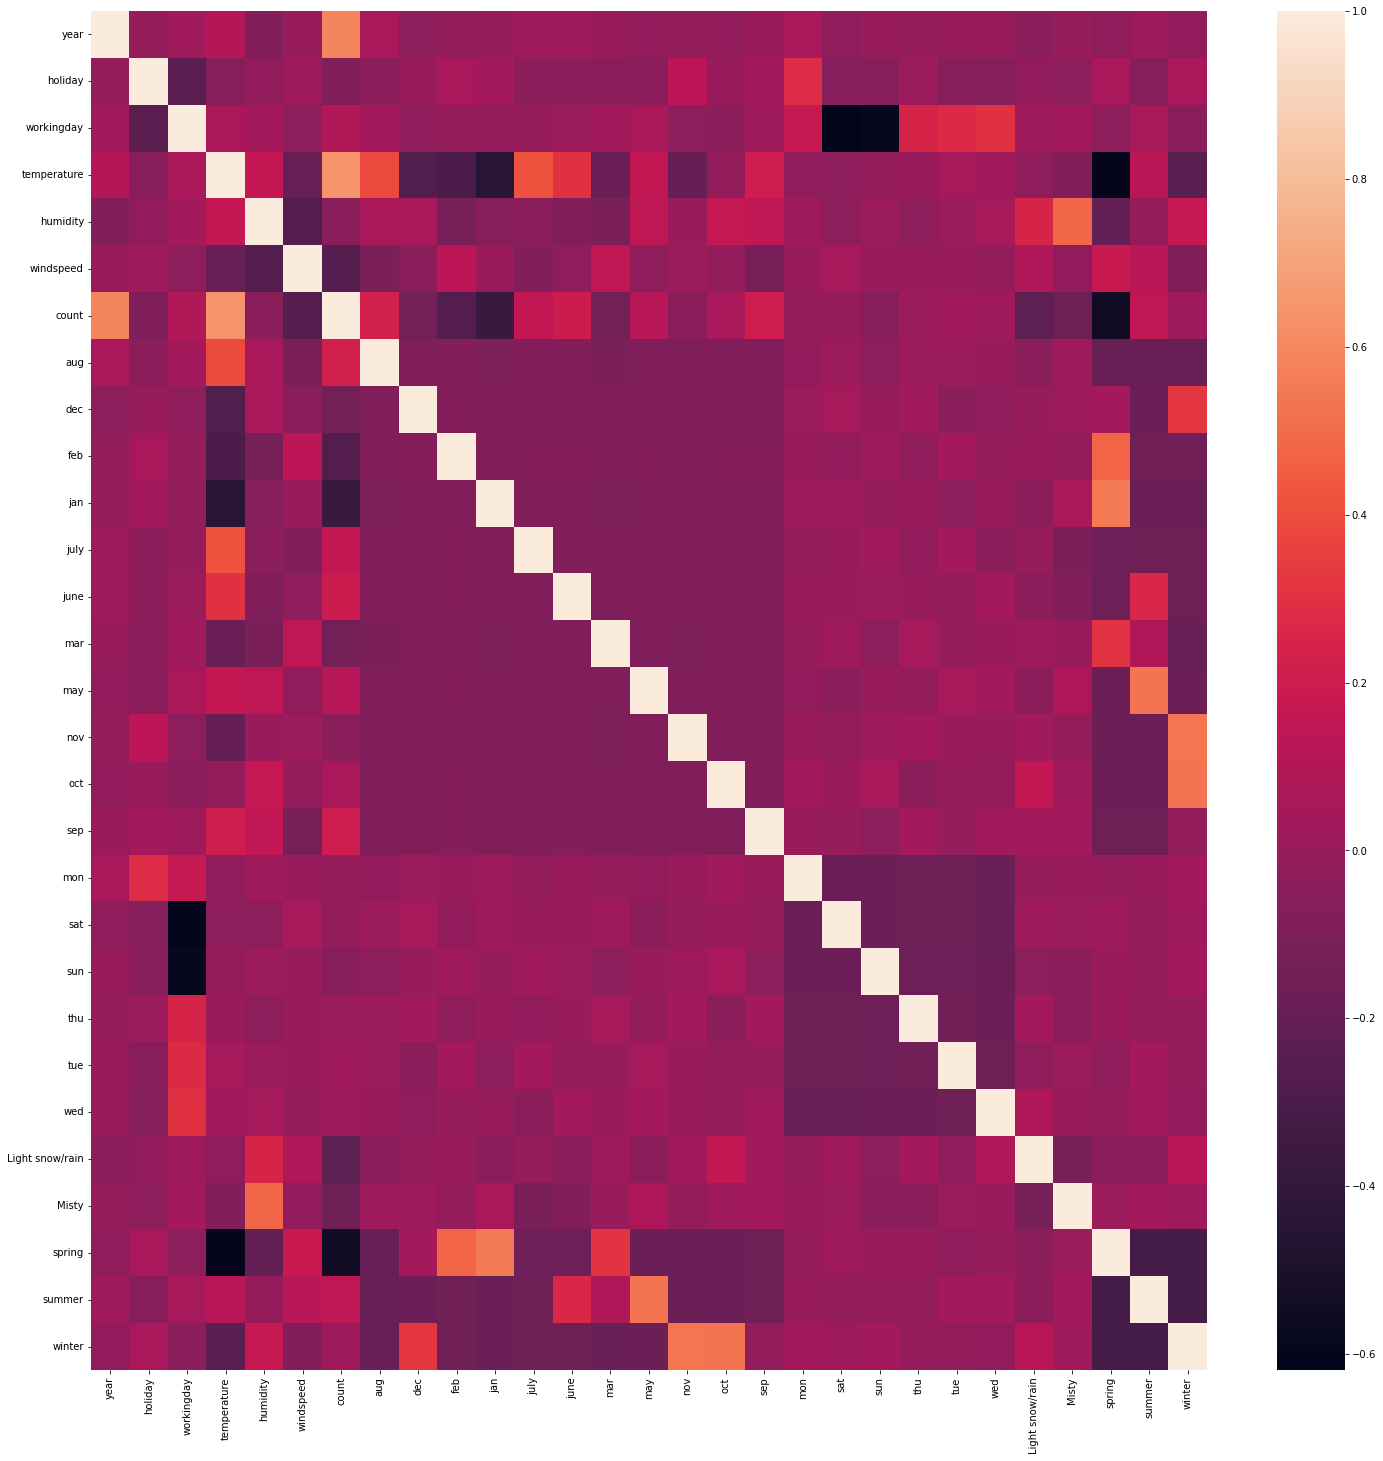

In [23]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr())

### The light coloured boxes denote a high correlation. Count is our target variable and it shows high correlation with the independent variables year and temperature. We could use this to make conclusions that the count is dependent on the temperature, and year. But let's evaluate further.

### The independent variables also have a degree of correlation amongst themselves. Spring is correlated with feb and jan, winter is correlated with nov and oct, Misty has correlation with humidity, and summer is correlated with may.

## Step 4:- Building the linear model


In [24]:
y_train = df_train.pop('count')
X_train = df_train

In [25]:
# Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light snow/rain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [27]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'july', 'sep', 'sat', 'Light snow/rain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [28]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [29]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [30]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [31]:
# calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,28.46
3,temperature,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Misty,2.29
0,year,2.08
8,sat,1.97


### Humidity shows high vif. We will build our first model to confirm the significance of this variable and then drop it.

In [32]:
# Building 1st linear regression model
import statsmodels.api as sm

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.11e-191
Time:                        21:40:16   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2402      0.036     

In [33]:
# The vif of humidity is high, so we drop it now.
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temperature,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,year,2.07
12,winter,1.98
7,sat,1.96
5,july,1.58
9,Misty,1.57


#### The vif values are below 10 now, so we don't need to necessarily drop, but we will check further since vif of temperature is still above 5

In [34]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.28e-188
Time:                        21:40:16   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1576      0.031     

#### The p value of workinfday is high. Let's drop it.

In [35]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temperature,5.12
3,windspeed,4.62
10,summer,2.23
9,spring,2.10
0,year,2.07
11,winter,1.79
4,july,1.58
8,Misty,1.55
5,sep,1.34
6,sat,1.19


In [36]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.68e-186
Time:                        16:33:44   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1960      0.030     

In [37]:
# Sat has a high p value. Dropping it.
X_train_new = X_train_new.drop(['sat'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temperature,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light snow/rain,1.08


In [38]:
# Model number 4
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          5.06e-187
Time:                        16:35:35   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [39]:
# July still has a non 0 p value. Let's eliminate it and rebuild our model.
X_train_new = X_train_new.drop(['july'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temperature,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light snow/rain,1.08
1,holiday,1.04


### Note that all the vif are below 5 now. This is good.


In [40]:
# Model number 5
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.47e-186
Time:                        16:39:27   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

In [41]:
# spring still has a non 0 p value. Let's eliminate it and rebuild our model.
X_train_new = X_train_new.drop(['spring'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
2,temperature,3.68
3,windspeed,3.06
0,year,2.00
7,summer,1.57
6,Misty,1.48
8,winter,1.37
4,sep,1.20
5,Light snow/rain,1.08
1,holiday,1.04


In [42]:
# Model number 6
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.83e-186
Time:                        16:40:45   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017     

### We can consider the model numer 6 to be the best fit as it has low multicollinearity and p values for all independent variables are 0

### The F-statistic has a value of 271.9 and Prob(f-statistic) is 2.83e-186 which is close to 0. This means our overall model is also significant.

In [43]:
# Checking the parameters and their coefficient values
lr_6.params

const              0.125926
year               0.232861
holiday           -0.098685
temperature        0.548008
windspeed         -0.153246
sep                0.101195
Light snow/rain   -0.282869
Misty             -0.078375
summer             0.088080
winter             0.129345
dtype: float64

## Step:- 5 Residual analysis of the train data and validation

In [44]:
X_train_lm_6

,const,year,holiday,temperature,windspeed,sep,Light snow/rain,Misty,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,1,0


In [45]:
y_train_pred = lr_6.predict(X_train_lm_6)

### Normality of error terms

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

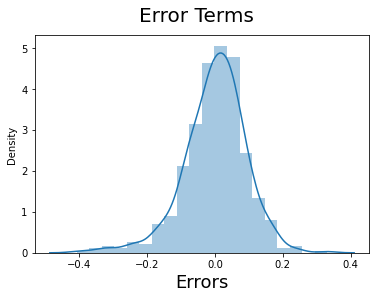

In [46]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Error terms are following normal distribution

In [47]:
calculateVIF(X_train_new)

,Features,VIF
2,temperature,3.68
3,windspeed,3.06
0,year,2.00
7,summer,1.57
6,Misty,1.48
8,winter,1.37
4,sep,1.20
5,Light snow/rain,1.08
1,holiday,1.04


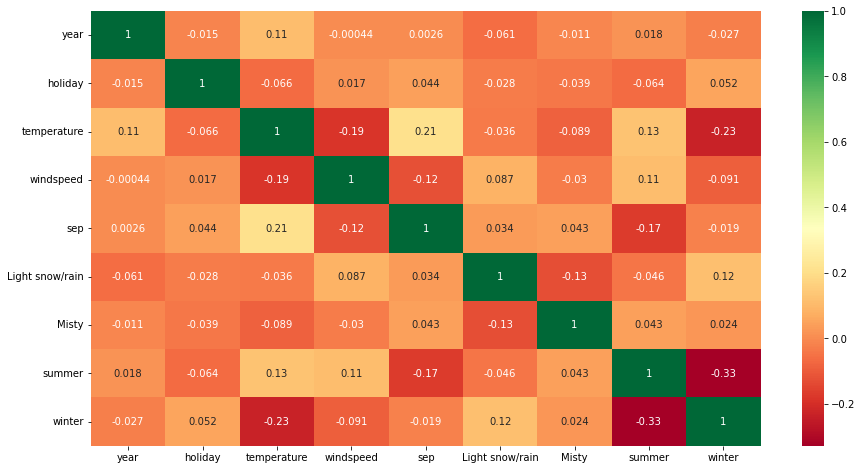

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### The vif is well below 5, and there is no strong correlation observed in the heatmap.

### Linearity

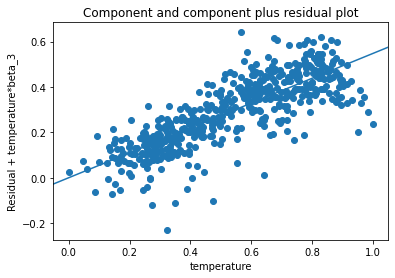

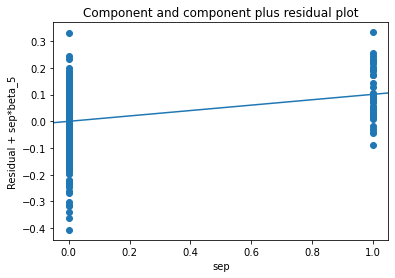

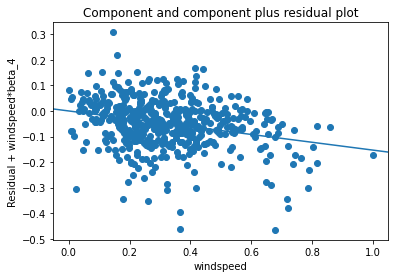

In [59]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temperature')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

### Homoscedasticity test

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


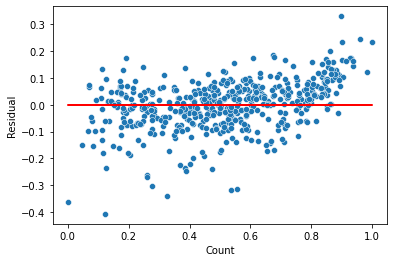

In [49]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### As we can see, there is no apparent pattern in the residuals.

## Step 6:- Making predictions using the final model

In [50]:
# Applying scaling on the test dataset

num_vars = ['temperature', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light snow/rain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [51]:
df_test.describe()

,year,holiday,workingday,temperature,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Light snow/rain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = df_test.pop('count')
X_test = df_test
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)
y_pred = lr_6.predict(X_test_lm_6)

## Step 7:- Evaluating the model

#### Rsquared of of y_pred wrt y_test

In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7942

Text(0, 0.5, 'y_pred')

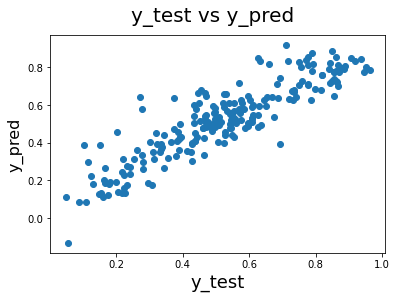

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [56]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7854


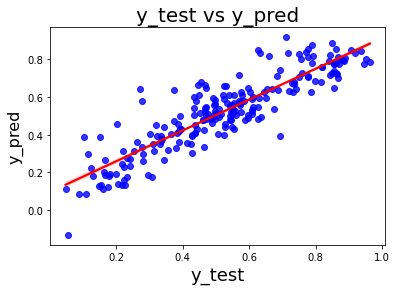

In [57]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparison between training and test datasets

#### The R^2 value for training set= 0.830
#### The R^2 value for test set= 0.7942
#### The adjusted value of R^2 for training set= 0.827
#### The adjusted value of r^2 for test set=0.7854

### As is evident, there isn't a significant dip in the R squared and adjusted R squared values from training to test data. Therefore, we can be fairly confident that our model predicts with high accuracy.